In [1]:
import torch
import math
from dataset import SatProblemDataSet
from models import MLP, LayerNormBasicLSTMCell, NeuroSAT
torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
def compute_loss(logits, labels, parameters):
    # x = logits, z = labels
    # max(x, 0) - x * z + log(1 + exp(-abs(x)))
    predict_costs = torch.nn.functional.relu(logits) - logits * labels + torch.log1p(torch.exp(-torch.abs(logits)))
    predict_cost = torch.mean(predict_costs)
    l2_cost = torch.zeros([])
    for p in parameters:
        l2_cost += torch.sum(p ** 2) / 2
    return predict_cost + 1e-9 * l2_cost

In [3]:
n = NeuroSAT(128, 3, 3, 16)

In [4]:
ds = SatProblemDataSet("data")
dl = torch.utils.data.DataLoader(ds)

In [5]:
optim = torch.optim.Adam(n.parameters(), lr = 1e-5, weight_decay = 1e-10)

In [6]:
n.train()
losses = []
loss_fn = torch.nn.BCELoss()
for _ in range(1):
    for prob, target in dl:
        optim.zero_grad()
        outputs = n(prob[0].float())
        torch.nn.utils.clip_grad_norm_(n.parameters(), 0.5)
        loss = compute_loss(outputs, target[0], n.parameters())
        print(outputs, target[0])
#         loss = loss_fn(outputs, target[0])
        desc = 'loss: %.4f; is_sta: %s' % (loss.item(), target[0])
        losses.append(loss.item())
        print(desc)

        loss.backward()
        optim.step()

tensor([0.2104], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.8039; is_sta: tensor([0.])
tensor([0.1623], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6153; is_sta: tensor([1.])
tensor([0.1922], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7939; is_sta: tensor([0.])
tensor([0.1575], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6175; is_sta: tensor([1.])
tensor([0.1406], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7659; is_sta: tensor([0.])
tensor([0.1342], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6283; is_sta: tensor([1.])
tensor([0.1827], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7887; is_sta: tensor([0.])
tensor([0.1614], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6157; is_sta: tensor([1.])
tensor([0.1297], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7601; is_sta: tensor([0.])
tensor([0.1094], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6400; is_sta: tensor([1.])
tensor([0.1365], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7637; is_sta: tensor([0.])
tensor([0.1202], grad

tensor([0.0992], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7440; is_sta: tensor([0.])
tensor([0.0964], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6461; is_sta: tensor([1.])
tensor([0.0952], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7419; is_sta: tensor([0.])
tensor([0.0913], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6485; is_sta: tensor([1.])
tensor([0.0923], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7404; is_sta: tensor([0.])
tensor([0.0895], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6494; is_sta: tensor([1.])
tensor([0.0911], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7397; is_sta: tensor([0.])
tensor([0.0900], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6491; is_sta: tensor([1.])
tensor([0.0918], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7401; is_sta: tensor([0.])
tensor([0.0878], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6502; is_sta: tensor([1.])
tensor([0.0834], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7357; is_sta: tensor([0.])
tensor([0.0796], grad

tensor([0.1016], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7452; is_sta: tensor([0.])
tensor([0.0991], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6448; is_sta: tensor([1.])
tensor([0.0423], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7145; is_sta: tensor([0.])
tensor([0.0398], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6734; is_sta: tensor([1.])
tensor([0.0693], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7284; is_sta: tensor([0.])
tensor([0.0653], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6610; is_sta: tensor([1.])
tensor([0.0616], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7244; is_sta: tensor([0.])
tensor([0.0605], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6634; is_sta: tensor([1.])
tensor([0.0549], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7210; is_sta: tensor([0.])
tensor([0.0517], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6676; is_sta: tensor([1.])
tensor([0.0689], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7282; is_sta: tensor([0.])
tensor([0.0635], grad

tensor([0.0284], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7074; is_sta: tensor([0.])
tensor([0.0251], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6807; is_sta: tensor([1.])
tensor([0.0304], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7085; is_sta: tensor([0.])
tensor([0.0286], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6790; is_sta: tensor([1.])
tensor([0.0445], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7157; is_sta: tensor([0.])
tensor([0.0431], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6718; is_sta: tensor([1.])
tensor([0.0297], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7081; is_sta: tensor([0.])
tensor([0.0284], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6790; is_sta: tensor([1.])
tensor([0.0279], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7072; is_sta: tensor([0.])
tensor([0.0259], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6803; is_sta: tensor([1.])
tensor([0.0615], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7244; is_sta: tensor([0.])
tensor([0.0633], grad

tensor([0.0081], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6972; is_sta: tensor([0.])
tensor([0.0066], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6899; is_sta: tensor([1.])
tensor([0.0433], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7150; is_sta: tensor([0.])
tensor([0.0409], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6729; is_sta: tensor([1.])
tensor([0.0318], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7092; is_sta: tensor([0.])
tensor([0.0294], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6785; is_sta: tensor([1.])
tensor([0.0093], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6978; is_sta: tensor([0.])
tensor([0.0021], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6921; is_sta: tensor([1.])
tensor([0.0238], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7051; is_sta: tensor([0.])
tensor([0.0158], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6853; is_sta: tensor([1.])
tensor([0.0856], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7369; is_sta: tensor([0.])
tensor([0.0896], grad

tensor([0.0046], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6955; is_sta: tensor([0.])
tensor([0.0034], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6914; is_sta: tensor([1.])
tensor([0.0077], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6970; is_sta: tensor([0.])
tensor([0.0071], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6896; is_sta: tensor([1.])
tensor([0.0424], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7146; is_sta: tensor([0.])
tensor([0.0493], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6688; is_sta: tensor([1.])
tensor([0.0147], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7005; is_sta: tensor([0.])
tensor([0.0151], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6856; is_sta: tensor([1.])
tensor([0.0203], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7033; is_sta: tensor([0.])
tensor([0.0189], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6837; is_sta: tensor([1.])
tensor([0.0072], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6968; is_sta: tensor([0.])
tensor([0.0060], grad

tensor([0.0132], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6998; is_sta: tensor([0.])
tensor([0.0120], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6871; is_sta: tensor([1.])
tensor([0.0067], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6965; is_sta: tensor([0.])
tensor([0.0062], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6901; is_sta: tensor([1.])
tensor([0.0071], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6967; is_sta: tensor([0.])
tensor([0.0032], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6915; is_sta: tensor([1.])
tensor([0.0145], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7004; is_sta: tensor([0.])
tensor([0.0193], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6835; is_sta: tensor([1.])
tensor([-0.0003], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6930; is_sta: tensor([0.])
tensor([-0.0025], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6944; is_sta: tensor([1.])
tensor([0.0058], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6961; is_sta: tensor([0.])
tensor([0.0033], gr

tensor([0.0034], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6949; is_sta: tensor([0.])
tensor([0.0029], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6917; is_sta: tensor([1.])
tensor([0.0052], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6957; is_sta: tensor([0.])
tensor([0.0042], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6910; is_sta: tensor([1.])
tensor([0.0010], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6937; is_sta: tensor([0.])
tensor([-7.6983e-05], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6932; is_sta: tensor([1.])
tensor([0.0262], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7064; is_sta: tensor([0.])
tensor([0.0242], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6811; is_sta: tensor([1.])
tensor([0.0061], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6962; is_sta: tensor([0.])
tensor([0.0053], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6905; is_sta: tensor([1.])
tensor([0.0004], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6934; is_sta: tensor([0.])
tensor([-0.0013]

tensor([0.0886], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7384; is_sta: tensor([0.])
tensor([0.0827], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6527; is_sta: tensor([1.])
tensor([0.0077], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6970; is_sta: tensor([0.])
tensor([0.0060], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6902; is_sta: tensor([1.])
tensor([0.0045], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6954; is_sta: tensor([0.])
tensor([0.0036], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6913; is_sta: tensor([1.])
tensor([-0.0022], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6920; is_sta: tensor([0.])
tensor([-0.0031], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6947; is_sta: tensor([1.])
tensor([0.0020], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6941; is_sta: tensor([0.])
tensor([0.0024], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6920; is_sta: tensor([1.])
tensor([0.0035], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6949; is_sta: tensor([0.])
tensor([0.0021], gr

tensor([-0.0089], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6887; is_sta: tensor([0.])
tensor([-0.0103], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6983; is_sta: tensor([1.])
tensor([0.0071], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6967; is_sta: tensor([0.])
tensor([0.0054], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6905; is_sta: tensor([1.])
tensor([-0.0032], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6915; is_sta: tensor([0.])
tensor([-0.0042], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6952; is_sta: tensor([1.])
tensor([-0.0031], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6916; is_sta: tensor([0.])
tensor([-0.0037], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6950; is_sta: tensor([1.])
tensor([-0.0008], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6928; is_sta: tensor([0.])
tensor([-0.0016], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6940; is_sta: tensor([1.])
tensor([-0.0008], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6927; is_sta: tensor([0.])
tensor([-0.0

tensor([-0.0037], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6913; is_sta: tensor([0.])
tensor([-0.0047], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6955; is_sta: tensor([1.])
tensor([-0.0070], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6896; is_sta: tensor([0.])
tensor([-0.0077], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6970; is_sta: tensor([1.])
tensor([0.0097], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6980; is_sta: tensor([0.])
tensor([0.0088], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6887; is_sta: tensor([1.])
tensor([0.0024], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6943; is_sta: tensor([0.])
tensor([0.0013], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6925; is_sta: tensor([1.])
tensor([0.0479], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7174; is_sta: tensor([0.])
tensor([0.0411], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6728; is_sta: tensor([1.])
tensor([0.1715], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7826; is_sta: tensor([0.])
tensor([0.1639], 

tensor([-0.0065], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6899; is_sta: tensor([0.])
tensor([-0.0062], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6963; is_sta: tensor([1.])
tensor([0.0169], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7017; is_sta: tensor([0.])
tensor([0.0158], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6853; is_sta: tensor([1.])
tensor([-0.0027], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6918; is_sta: tensor([0.])
tensor([-0.0033], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6948; is_sta: tensor([1.])
tensor([-0.0108], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6878; is_sta: tensor([0.])
tensor([-0.0120], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6991; is_sta: tensor([1.])
tensor([-0.0011], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6926; is_sta: tensor([0.])
tensor([-0.0019], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6941; is_sta: tensor([1.])
tensor([0.0044], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6953; is_sta: tensor([0.])
tensor([0.003

tensor([0.0096], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6979; is_sta: tensor([0.])
tensor([0.0086], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6888; is_sta: tensor([1.])
tensor([-0.0077], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6893; is_sta: tensor([0.])
tensor([-0.0086], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6975; is_sta: tensor([1.])
tensor([0.0019], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6941; is_sta: tensor([0.])
tensor([0.0013], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6925; is_sta: tensor([1.])
tensor([0.0079], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6971; is_sta: tensor([0.])
tensor([0.0070], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6897; is_sta: tensor([1.])
tensor([-0.0053], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6905; is_sta: tensor([0.])
tensor([-0.0062], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6962; is_sta: tensor([1.])
tensor([0.0011], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6937; is_sta: tensor([0.])
tensor([-0.0001],

tensor([-0.0110], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6877; is_sta: tensor([0.])
tensor([-0.0124], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6994; is_sta: tensor([1.])
tensor([0.0055], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6959; is_sta: tensor([0.])
tensor([0.0046], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6908; is_sta: tensor([1.])
tensor([-0.0018], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6923; is_sta: tensor([0.])
tensor([-0.0025], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6944; is_sta: tensor([1.])
tensor([-0.0079], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6892; is_sta: tensor([0.])
tensor([-0.0088], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6975; is_sta: tensor([1.])
tensor([-0.0050], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6906; is_sta: tensor([0.])
tensor([-0.0063], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6963; is_sta: tensor([1.])
tensor([-0.0082], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6891; is_sta: tensor([0.])
tensor([-0.0

tensor([-0.0048], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6908; is_sta: tensor([0.])
tensor([-0.0052], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6958; is_sta: tensor([1.])
tensor([-0.0113], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6875; is_sta: tensor([0.])
tensor([-0.0123], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6993; is_sta: tensor([1.])
tensor([0.0071], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6967; is_sta: tensor([0.])
tensor([0.0062], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6900; is_sta: tensor([1.])
tensor([-0.0012], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6925; is_sta: tensor([0.])
tensor([-0.0024], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6944; is_sta: tensor([1.])
tensor([-0.0095], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6884; is_sta: tensor([0.])
tensor([-0.0105], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6984; is_sta: tensor([1.])
tensor([-0.0090], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6887; is_sta: tensor([0.])
tensor([-0.0

tensor([-0.0038], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6912; is_sta: tensor([0.])
tensor([-0.0043], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6953; is_sta: tensor([1.])
tensor([-0.0021], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6921; is_sta: tensor([0.])
tensor([-0.0065], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6964; is_sta: tensor([1.])
tensor([-0.0087], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6888; is_sta: tensor([0.])
tensor([-0.0101], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6982; is_sta: tensor([1.])
tensor([-0.0036], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6913; is_sta: tensor([0.])
tensor([-0.0045], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6954; is_sta: tensor([1.])
tensor([-0.0119], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6872; is_sta: tensor([0.])
tensor([-0.0130], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6997; is_sta: tensor([1.])
tensor([-0.0098], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6883; is_sta: tensor([0.])
tensor([-0

tensor([0.0072], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6967; is_sta: tensor([0.])
tensor([0.0064], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6899; is_sta: tensor([1.])
tensor([-0.0015], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6924; is_sta: tensor([0.])
tensor([-0.0021], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6942; is_sta: tensor([1.])
tensor([0.0008], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6935; is_sta: tensor([0.])
tensor([0.0002], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6930; is_sta: tensor([1.])
tensor([-0.0059], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6902; is_sta: tensor([0.])
tensor([-0.0069], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6966; is_sta: tensor([1.])
tensor([0.0025], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6944; is_sta: tensor([0.])
tensor([0.0019], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6922; is_sta: tensor([1.])
tensor([-0.0106], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6879; is_sta: tensor([0.])
tensor([-0.0115]

tensor([-0.0004], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6930; is_sta: tensor([0.])
tensor([-0.0012], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6937; is_sta: tensor([1.])
tensor([0.0006], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6935; is_sta: tensor([0.])
tensor([2.4314e-05], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6931; is_sta: tensor([1.])
tensor([-0.0050], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6907; is_sta: tensor([0.])
tensor([-0.0056], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6959; is_sta: tensor([1.])
tensor([-0.0110], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6876; is_sta: tensor([0.])
tensor([-0.0119], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6991; is_sta: tensor([1.])
tensor([-0.0058], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6903; is_sta: tensor([0.])
tensor([-0.0064], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6963; is_sta: tensor([1.])
tensor([0.0181], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.7022; is_sta: tensor([0.])
tensor([0

tensor([-0.0102], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6881; is_sta: tensor([0.])
tensor([-0.0109], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6986; is_sta: tensor([1.])
tensor([0.0001], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6932; is_sta: tensor([0.])
tensor([-0.0004], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6933; is_sta: tensor([1.])
tensor([-0.0059], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6902; is_sta: tensor([0.])
tensor([-0.0069], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6966; is_sta: tensor([1.])
tensor([-0.0080], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6891; is_sta: tensor([0.])
tensor([-0.0083], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6973; is_sta: tensor([1.])
tensor([-0.0038], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6913; is_sta: tensor([0.])
tensor([-0.0057], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6960; is_sta: tensor([1.])
tensor([-0.0057], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6903; is_sta: tensor([0.])
tensor([-0.

tensor([0.0023], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6943; is_sta: tensor([0.])
tensor([0.0015], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6924; is_sta: tensor([1.])
tensor([-0.0053], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6905; is_sta: tensor([0.])
tensor([-0.0064], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6963; is_sta: tensor([1.])
tensor([-0.0047], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6908; is_sta: tensor([0.])
tensor([-0.0064], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6963; is_sta: tensor([1.])
tensor([0.0025], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6944; is_sta: tensor([0.])
tensor([0.0017], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6923; is_sta: tensor([1.])
tensor([-0.0085], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6889; is_sta: tensor([0.])
tensor([-0.0097], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6980; is_sta: tensor([1.])
tensor([0.0098], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6981; is_sta: tensor([0.])
tensor([0.0089]

tensor([0.0031], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6947; is_sta: tensor([0.])
tensor([0.0024], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6919; is_sta: tensor([1.])
tensor([0.0019], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6941; is_sta: tensor([0.])
tensor([0.0013], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6925; is_sta: tensor([1.])
tensor([-0.0015], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6924; is_sta: tensor([0.])
tensor([-0.0020], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6942; is_sta: tensor([1.])
tensor([-0.0088], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6887; is_sta: tensor([0.])
tensor([-0.0097], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6980; is_sta: tensor([1.])
tensor([-0.0079], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6892; is_sta: tensor([0.])
tensor([-0.0085], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6974; is_sta: tensor([1.])
tensor([-0.0049], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6907; is_sta: tensor([0.])
tensor([-0.005

tensor([-0.0023], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6920; is_sta: tensor([0.])
tensor([-0.0029], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6946; is_sta: tensor([1.])
tensor([-0.0078], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6893; is_sta: tensor([0.])
tensor([-0.0084], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6974; is_sta: tensor([1.])
tensor([0.0018], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6940; is_sta: tensor([0.])
tensor([0.0010], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6927; is_sta: tensor([1.])
tensor([-0.0088], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6887; is_sta: tensor([0.])
tensor([-0.0095], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6979; is_sta: tensor([1.])
tensor([0.0050], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6957; is_sta: tensor([0.])
tensor([0.0044], grad_fn=<AddBackward0>) tensor([1.])
loss: 0.6910; is_sta: tensor([1.])
tensor([0.0095], grad_fn=<AddBackward0>) tensor([0.])
loss: 0.6979; is_sta: tensor([0.])
tensor([0.0086]

In [7]:
import matplotlib.pyplot as plt

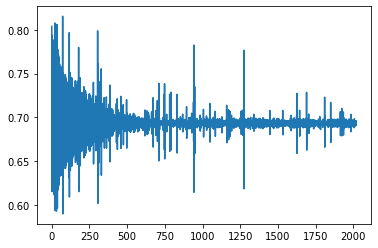

In [8]:
plt.plot([i for i in range(len(losses))], losses)